# Pre-processing

In [2]:
#open Howell1.csv


import pandas as pd
import numpy as np

data = pd.read_csv('Howell1.csv', sep=';')
#drop age
data = data.drop('age', axis=1)
#get info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   male    544 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 12.9 KB


,height,weight,male
count,544.000000,544.000000,544.000000
mean,138.263596,35.610618,0.472426
std,27.602448,14.719178,0.499699
min,53.975000,4.252425,0.000000
25%,125.095000,22.007717,0.000000
50%,148.590000,40.057844,0.000000
75%,157.480000,47.209005,1.000000
max,179.070000,62.992589,1.000000


In [3]:
#X should be weight and height
X_all = data[['weight','height']]
y_all = data['male']

#take off mean, divide by std
X_all = (X_all - X_all.mean()) / X_all.std()

X_all.describe()

X_all = X_all.values
y_all = y_all.values


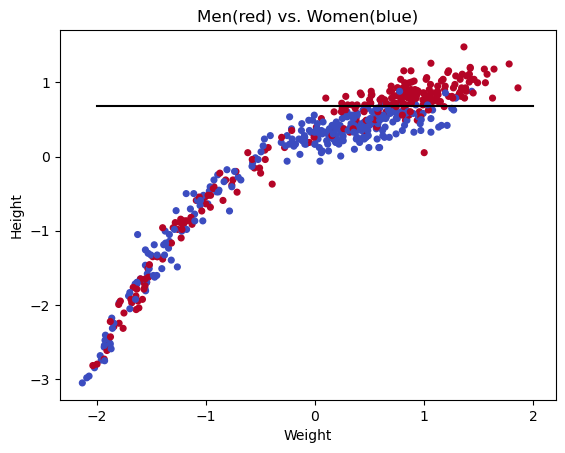

In [4]:

#print statistics on X


#split into test and train with 20% test

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_all,y_all,test_size=.2, random_state=1)



#2d scatter plot of X[0] and X[1] with y as color
import matplotlib.pyplot as plt
plt.scatter(X_all[:,0], X_all[:,1], c=y_all, cmap='coolwarm',s=17)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Men(red) vs. Women(blue)')

#plot a black line for y=0.68
x = np.linspace(-2,2,100)
yy = [0.68]*100
plt.plot(x,yy,'k-')
plt.show()

## FROM NOW ON ONLY USE X AND y


# TREE CLASSIFIERS (W/ pruning)

ON THE TEST SET
0.7798165137614679
--- 0.0010292530059814453 seconds ---
[0 0 1]
1 0.684682160615921
0.7798165137614679


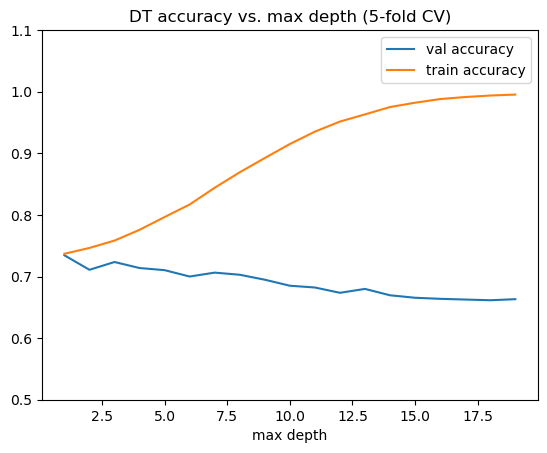

In [86]:
#fit tree classifier

from sklearn.tree import DecisionTreeClassifier
#import accuracy score
from sklearn.metrics import accuracy_score

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
NBFOLDS=20
PARAMRANGE=range(1,20)
for i in PARAMRANGE:  #1,30 is the range of max_depth

    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(NBFOLDS):
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        #fit tree classifier
        tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=i,random_state=1) #should overfit
        tree.fit(X_train,y_train)
        #predict
        y_pred = tree.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))
        #train accuracy
        y_pred_train = tree.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))
    val_accuracies.append(val_average/NBFOLDS)
    train_accuracies.append(train_average/NBFOLDS)
    




import matplotlib.pyplot as plt
plt.plot(PARAMRANGE,val_accuracies)
plt.plot(PARAMRANGE,train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('max depth')
#rescale the y axis to show 0
plt.ylim(.5,1.1)
plt.title('DT accuracy vs. max depth (5-fold CV)')

print("ON THE TEST SET")
#get tree accuracy with depth 1 on test set
tree1 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1,random_state=1) 
tree1.fit(X,y)
#predict
y_pred = tree1.predict(X_test)


#accuracy
print(accuracy_score(y_test, y_pred))

import time
start_time = time.time()
tree2 = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1,random_state=1)



tree2.fit(X,y)
print("--- %s seconds ---" % (time.time() - start_time))


Xunderstand=[[0.6,0],[0.6,0.68],[1,0.69]]  #for 0.68 it changes
print(tree2.predict(Xunderstand))
#predict
y_pred = tree2.predict(X_test)

split_feature = tree2.tree_.feature[0]
threshold = tree2.tree_.threshold[0]

print(split_feature, threshold)
#accuracy
print(accuracy_score(y_test, y_pred))

# SVMs

(0.0, 1.1)

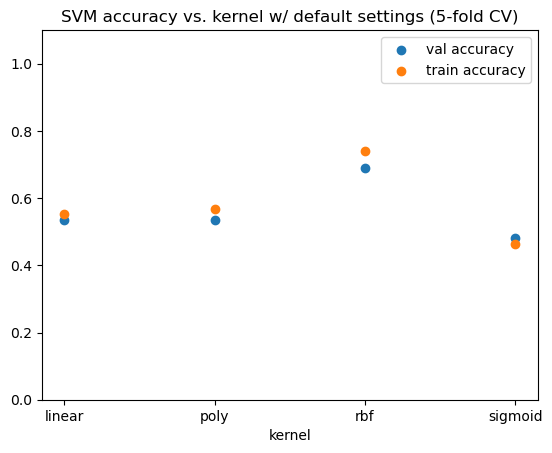

In [100]:
#fit SVM
from sklearn.svm import SVC

kernelsToTry=['linear','poly','rbf','sigmoid']



#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
for i in range(len(kernelsToTry)):
    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(5): #5 fold cross validation

        #0.split set randomly (different split each loop)
        #1.fit classifer
        #2. predict for val and test
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        
        #fit SVM classifier
        svm = SVC(kernel=kernelsToTry[i],random_state=1)
        svm.fit(X_train,y_train)

        #predict
        y_pred = svm.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))

        #train accuracy
        y_pred_train = svm.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))




    val_accuracies.append(val_average/5)
    train_accuracies.append(train_average/5)
    




import matplotlib.pyplot as plt

#make scatter plot graphing val accracy and train accuracy for each kernel
plt.scatter(kernelsToTry,val_accuracies)
plt.scatter(kernelsToTry,train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.title('SVM accuracy vs. kernel w/ default settings (5-fold CV)')
plt.xlabel('kernel')
#rescale the y axis to show 0
plt.ylim(0,1.1)


--- 0.006459951400756836 seconds ---
--- 0.006907939910888672 seconds ---
--- 0.005919933319091797 seconds ---
--- 0.00597691535949707 seconds ---
--- 0.007782936096191406 seconds ---
16
16


(0.0, 1.1)

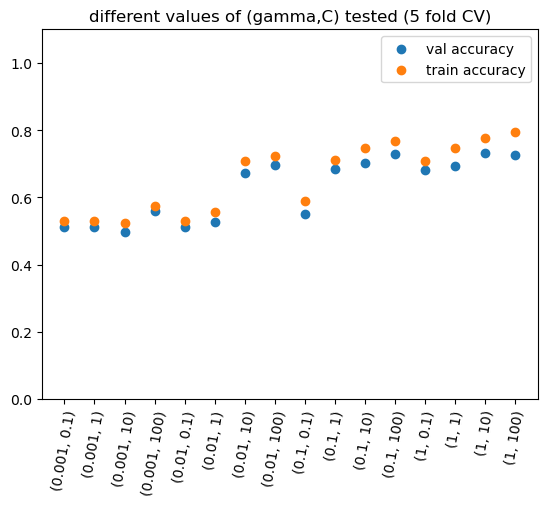

In [103]:
#fit SVM
from sklearn.svm import SVC

param_combinations = [
    (0.001, 0.1),
    (0.001, 1),
    (0.001, 10),
    (0.001, 100),
    (0.01, 0.1),
    (0.01, 1),
    (0.01, 10),
    (0.01, 100),
    (0.1, 0.1),
    (0.1, 1),
    (0.1, 10),
    (0.1, 100),
    (1, 0.1),
    (1, 1),
    (1, 10),
    (1, 100)
]

#0.01 looks good for gamma
#gamma,C



#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
for i in range(len(param_combinations)):
    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(5): #5 fold cross validation

        #0.split set randomly (different split each loop)
        #1.fit classifer
        #2. predict for val and test
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        
        #fit SVM classifier
        if(param_combinations[i]==(0.1,100)):
            #time
            start_time = time.time()
        svm = SVC(kernel='rbf',C=param_combinations[i][1],gamma=param_combinations[i][0],random_state=1)
        svm.fit(X_train,y_train)
        #end timer
        if(param_combinations[i]==(0.1,100)):
            print("--- %s seconds ---" % (time.time() - start_time))
        #predict
        y_pred = svm.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))

        #train accuracy
        y_pred_train = svm.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))




    val_accuracies.append(val_average/5)
    train_accuracies.append(train_average/5)
    




import matplotlib.pyplot as plt

#make scatter plot graphing val accracy and train accuracy for each kernel

print(len(param_combinations))
print(len(val_accuracies))
plt.scatter(range(len(param_combinations)),val_accuracies)
plt.scatter(range(len(param_combinations)),train_accuracies)


#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.title("different values of (gamma,C) tested (5 fold CV)")
plt.xticks(range(len(param_combinations)), [f"({gamma}, {C})" for gamma, C in param_combinations], rotation=80)

#rescale the y axis to show 0
plt.ylim(0,1.1)


#large C = overfit, small margin OK https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#high gamma : only local points matter, low gamma: far points matter
# so high high gamma you can have very complex decision boundaries, and overfitting




20
20


(0.0, 1.1)

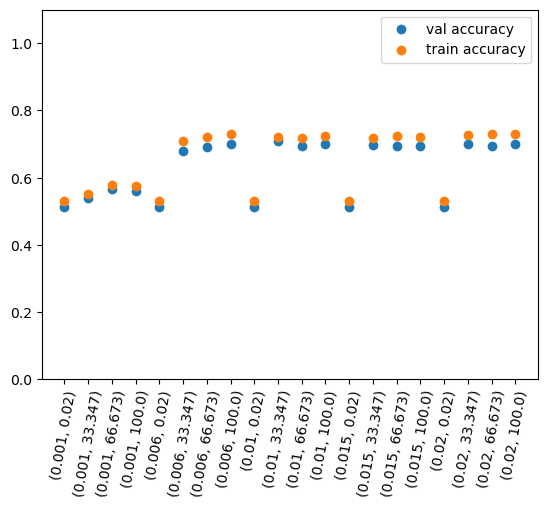

In [102]:
#fit SVM
from sklearn.svm import SVC

param1_values = np.linspace(0.001, 0.02, 5)
param2_values = np.linspace(0.02, 100,4 )

param_combinations = [(param1, param2) for param1 in param1_values for param2 in param2_values]



#0.01 looks good for gamma
#gamma,C



#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
for i in range(len(param_combinations)):
    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(5): #5 fold cross validation

        #0.split set randomly (different split each loop)
        #1.fit classifer
        #2. predict for val and test
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        
        #fit SVM classifier
        svm = SVC(kernel='rbf',C=param_combinations[i][1],gamma=param_combinations[i][0],random_state=1)
        svm.fit(X_train,y_train)

        #predict
        y_pred = svm.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))

        #train accuracy
        y_pred_train = svm.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))




    val_accuracies.append(val_average/5)
    train_accuracies.append(train_average/5)
    




import matplotlib.pyplot as plt

#make scatter plot graphing val accracy and train accuracy for each kernel

print(len(param_combinations))
print(len(val_accuracies))
plt.scatter(range(len(param_combinations)),val_accuracies)
plt.scatter(range(len(param_combinations)),train_accuracies)


#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xticks(range(len(param_combinations)), [f"({round(gamma,3)}, {round(C,3)})" for gamma, C in param_combinations], rotation=80)

#rescale the y axis to show 0
plt.ylim(0,1.1)


#large C = overfit, small margin OK https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#high gamma : only local points matter, low gamma: far points matter
# so high high gamma you can have very complex decision boundaries, and overfitting




# NOW ANN

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
keras.utils.set_random_seed(1)
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model


verbose, epochs, batch_size = 0, 250, 32
activationFunction='relu'

def getModel(p):
    # model = Sequential()
    # model.add(Dense(9, input_dim = X_train.shape[1], activation='sigmoid'))

    # model.add(Dense(6, activation='relu'))
    


    # model.add(Dense(1, activation='sigmoid'))
    
    # model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # return model

    model = keras.Sequential([
    keras.layers.Input(shape=(2,)),  # Input layer with 2 features (height and weight)
    keras.layers.Dense(p[0], activation='sigmoid'),  # Hidden layer 
    keras.layers.Dense(p[1], activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])
    return model





2023-09-24 21:21:31.866104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
## for tensorflow you want y 0 or 1
import time

import matplotlib.pyplot as plt

def getAccuracies(p,numfolds,plotGraphs=True):
    NUMFOLDS=numfolds
    class CustomCallback(keras.callbacks.Callback):
        def on_train_batch_begin(self, batch, logs=None):
            keys = list(logs.keys())


            #print current loss and validation loss
            #print(f"Batch {batch}: Current Loss = {logs['loss']}, Validation Loss = {logs['val_loss']}")

    
    model = getModel(p)


    optimizer='adam'
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



    skf = StratifiedKFold(n_splits=NUMFOLDS, shuffle=True, random_state=42)


    foldNum=0

    histories=[]
    for train_index, val_index in skf.split(X_all, y_all):
        model = getModel(p)

        #change adam learning rate
        optimizer=keras.optimizers.Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        foldNum+=1


        Xtrain, Xval = X_all[train_index], X_all[val_index]
        Ytrain, Yval = y_all[train_index], y_all[val_index]
        
        #BEGIN time

        #time
        start_time = time.time()
        history = model.fit(Xtrain, Ytrain, 
                            validation_data = (Xval, Yval), 
                            epochs=epochs, 
                            batch_size=batch_size,
                            callbacks=[CustomCallback()],
                            verbose=verbose)
        #end time
        print("--- %s seconds ---" % (time.time() - start_time))
        #print networks prediction on Xtrain[0]
        #TODO
        print(model.predict(Xtrain[0].reshape(1, -1)))
        #print actual ytrain.head
        #TODO
        print(Ytrain[0])
        
        #END time

        #print info on history
        #print(history.history.keys())
        #print(history.history['accuracy'])
        histories.append(history)


    #plot relevant stuff with matplotlib
    #Histories has a list of keras history objects

    #average them out

    accuracyPerEpoch=np.zeros(epochs)
    val_accuracyPerEpoch=np.zeros(epochs)
    counter=0
    for h in histories:
        counter=0
        for e in h.history['accuracy']:
            accuracyPerEpoch[counter]+=e
            counter+=1

        counter=0
        for e in h.history['val_accuracy']:
            val_accuracyPerEpoch[counter]+=e
            counter+=1
        

    #print(accuracyPerEpoch/NUMFOLDS)
    #print(val_accuracyPerEpoch/NUMFOLDS)

    #plot these two
    if(plotGraphs):
        plt.plot(range(epochs),accuracyPerEpoch/NUMFOLDS)
        plt.plot(range(epochs),val_accuracyPerEpoch/NUMFOLDS)

        #legend
        plt.legend(['train accuracy','val accuracy'])
        plt.title('Simpler model (10,50) (10 fold CV))')
        
        plt.xlabel('epoch')
        plt.show()

    return accuracyPerEpoch[-1]/NUMFOLDS,val_accuracyPerEpoch[-1]/NUMFOLDS



#create grid of nnparams


toTest=[[50,40],[100,20],[60,60]]

# results=[]
# for param in toTest:

#     results.append(getAccuracies(param,5,plotGraphs=False))
#     print('working')



#nnparams=[64,64]
#print(getAccuracies(nnparams,5,plotGraphs=True))  #with 2 folds

# nnparams=[5,10]
# print(getAccuracies(nnparams,3,plotGraphs=False))  #with 2 folds

print(getAccuracies([10,50],10,plotGraphs=True))  #with 2 folds


NameError: name 'time' is not defined

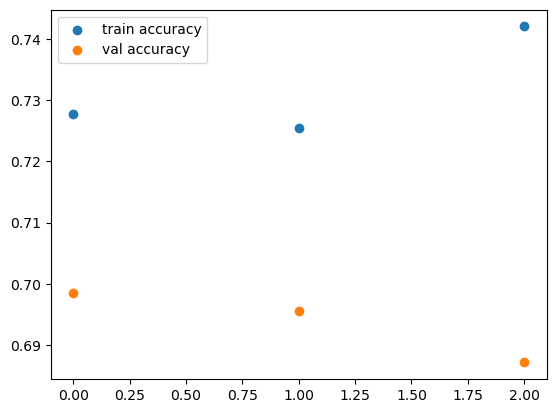

[(0.7277017116546631, 0.6985093116760254), (0.7255537509918213, 0.695610761642456), (0.7420850396156311, 0.6871221542358399)]


In [134]:
#plot results vs nnparams
plt.scatter(range(len(toTest)),[x[0] for x in results])
plt.scatter(range(len(toTest)),[x[1] for x in results])

#add legends to the graphs
plt.legend(['train accuracy','val accuracy'])

plt.show()
print(results)

#toTest=[[5,10],[10,10],[20,10],[50,10],[5,20],[10,20],[30,20],[50,20]]
#[(0.59551842212677, 0.5577639818191529), (0.6609061121940613, 0.6266252636909485), (0.6342977166175843, 0.5979710102081299), (0.7018694639205932, 0.6842236042022705), (0.6422088027000428, 0.6036853075027466), (0.6501199007034302, 0.6122567296028137), (0.6702096223831177, 0.6351966857910156), (0.6881978273391723, 0.6553209304809571)]



# BOOSTING

In [98]:
#now with boosting and small decision trees (number of weak learners)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#fit tree classifier

from sklearn.tree import DecisionTreeClassifier
#import accuracy score
from sklearn.metrics import accuracy_score

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
FOLDS=5
PARAMRANGE=range(2,3)
for i in PARAMRANGE:  #1,30 is the range of max_depth

    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(FOLDS): #5 fold cross validation

        
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        #fit tree classifier
        
        #start time
        start_time = time.time()

        base_classifier = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1,random_state=1)

        # Create an AdaBoost classifier using the base classifier
        if(i==0):
            adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=3, random_state=1)
        else:
            adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=i*10, random_state=1)


            # Train the AdaBoost classifier
        adaboost_classifier.fit(X_train, y_train)

        #end time
        print("--- %s seconds ---" % (time.time() - start_time))

            # Make predictions on the test set
        y_pred = adaboost_classifier.predict(X_val)

          


        val_average+=(accuracy_score(y_val, y_pred))
        y_pred_train = adaboost_classifier.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))


    val_accuracies.append(val_average/FOLDS)
    train_accuracies.append(train_average/FOLDS)
    




import matplotlib.pyplot as plt




--- 0.0783700942993164 seconds ---
--- 0.15348100662231445 seconds ---
--- 0.26410579681396484 seconds ---
--- 0.11712789535522461 seconds ---
--- 0.08516597747802734 seconds ---


(0.0, 1.1)

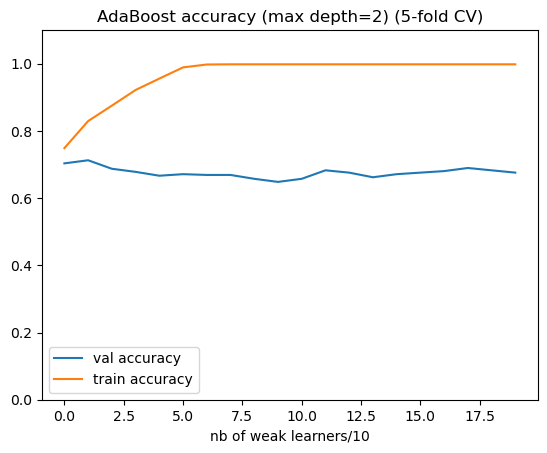

In [95]:
plt.plot(PARAMRANGE,val_accuracies)
plt.plot(PARAMRANGE,train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('nb of weak learners/10')
plt.title('AdaBoost accuracy (max depth=2) (5-fold CV)')
#rescale the y axis to show 0
plt.ylim(0,1.1)


# k-NN

(0.6, 1.0)

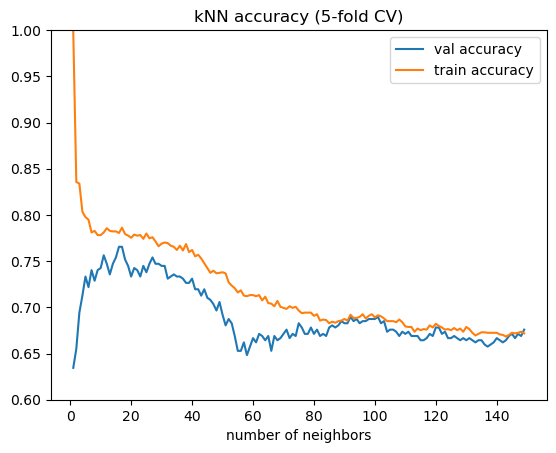

In [107]:
#with kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a k-NN classifier with 7 neighbors: knn









#now with boosting and small decision trees (number of weak learners)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#fit tree classifier

from sklearn.tree import DecisionTreeClassifier
#import accuracy score
from sklearn.metrics import accuracy_score

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
FOLDS=5
PARAMRANGE=range(1,150)
for i in PARAMRANGE:  #1,30 is the range of max_depth

    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(FOLDS): #5 fold cross validation
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        #fit tree classifier
        


        knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')

        # Fit the classifier to the training data
        knn.fit(X_train,y_train)

        # Predict the labels of the test data: y_pred
        y_pred = knn.predict(X_val)




          


        val_average+=(accuracy_score(y_val, y_pred))
        y_pred_train = knn.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))


    val_accuracies.append(val_average/FOLDS)
    train_accuracies.append(train_average/FOLDS)
    




import matplotlib.pyplot as plt
plt.plot(PARAMRANGE,val_accuracies)
plt.plot(PARAMRANGE,train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('number of neighbors')
plt.title('kNN accuracy (5-fold CV)')
#rescale the y axis to show 0
plt.ylim(0.6,1)





In [117]:
#kNN on the whole X with 17 neighbors
knn = KNeighborsClassifier(n_neighbors=24,metric='euclidean')
#time
start_time = time.time()
# Fit the classifier to the training data
knn.fit(X,y)
print("--- %s seconds ---" % (time.time() - start_time))

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


#accurracy
print(accuracy_score(y_test, y_pred))


--- 0.0009341239929199219 seconds ---
0.6972477064220184
